<a href="https://colab.research.google.com/github/ameyagumaste/Python_NETCDF_Arctic/blob/main/Global%20Surface%20Temprature%20Anomay_1980_2010_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install matplotlib
!pip install xarray
!pip install netCDF4
!pip install pandas




<xarray.Dataset> Size: 18MB
Dimensions:  (time: 1716, lat: 36, lon: 72, z: 1)
Coordinates:
  * time     (time) datetime64[ns] 14kB 1880-01-01 1880-02-01 ... 2022-12-01
  * lat      (lat) float32 144B -87.5 -82.5 -77.5 -72.5 ... 72.5 77.5 82.5 87.5
  * lon      (lon) float32 288B 2.5 7.5 12.5 17.5 ... 342.5 347.5 352.5 357.5
  * z        (z) float32 4B 0.0
Data variables:
    anom     (time, z, lat, lon) float32 18MB ...
Attributes: (12/66)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           NOAA Merged Land Ocean Global Surface Te...
    summary:                         NOAAGlobalTemp is a merged land-ocean su...
    institution:                     DOC/NOAA/NESDIS/National Centers for Env...
    id:                               gov.noaa.ncdc:C00934 
    naming_authority:                 gov.noaa.ncei 
    ...                              ...
    time_coverage_duration:          P143Y0M
    references:                      Vose, R. S., et al., 20

In [11]:
ds=xr.open_dataset("NOAAGlobalTemp_v5.0.0_gridded_s188001_e202212_c20230108T133308.nc")
print(ds)

<xarray.Dataset> Size: 18MB
Dimensions:  (time: 1716, lat: 36, lon: 72, z: 1)
Coordinates:
  * time     (time) datetime64[ns] 14kB 1880-01-01 1880-02-01 ... 2022-12-01
  * lat      (lat) float32 144B -87.5 -82.5 -77.5 -72.5 ... 72.5 77.5 82.5 87.5
  * lon      (lon) float32 288B 2.5 7.5 12.5 17.5 ... 342.5 347.5 352.5 357.5
  * z        (z) float32 4B 0.0
Data variables:
    anom     (time, z, lat, lon) float32 18MB ...
Attributes: (12/66)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           NOAA Merged Land Ocean Global Surface Te...
    summary:                         NOAAGlobalTemp is a merged land-ocean su...
    institution:                     DOC/NOAA/NESDIS/National Centers for Env...
    id:                               gov.noaa.ncdc:C00934 
    naming_authority:                 gov.noaa.ncei 
    ...                              ...
    time_coverage_duration:          P143Y0M
    references:                      Vose, R. S., et al., 20

In [12]:
print(ds['anom'])

<xarray.DataArray 'anom' (time: 1716, z: 1, lat: 36, lon: 72)> Size: 18MB
[4447872 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 14kB 1880-01-01 1880-02-01 ... 2022-12-01
  * lat      (lat) float32 144B -87.5 -82.5 -77.5 -72.5 ... 72.5 77.5 82.5 87.5
  * lon      (lon) float32 288B 2.5 7.5 12.5 17.5 ... 342.5 347.5 352.5 357.5
  * z        (z) float32 4B 0.0
Attributes:
    long_name:              Global Temperature Anomalies
    standard_name:          surface_temperature_anomaly
    coverage_content_type:  physicalMeasurement
    units:                  degrees C
    valid_min:              -40.0
    valid_max:              40.0


In [13]:
desired_date = '2022-12-01'
data_for_desired_date=ds.sel(time=desired_date)
print(data_for_desired_date)

<xarray.Dataset> Size: 11kB
Dimensions:  (lat: 36, lon: 72, z: 1)
Coordinates:
    time     datetime64[ns] 8B 2022-12-01
  * lat      (lat) float32 144B -87.5 -82.5 -77.5 -72.5 ... 72.5 77.5 82.5 87.5
  * lon      (lon) float32 288B 2.5 7.5 12.5 17.5 ... 342.5 347.5 352.5 357.5
  * z        (z) float32 4B 0.0
Data variables:
    anom     (z, lat, lon) float32 10kB ...
Attributes: (12/66)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           NOAA Merged Land Ocean Global Surface Te...
    summary:                         NOAAGlobalTemp is a merged land-ocean su...
    institution:                     DOC/NOAA/NESDIS/National Centers for Env...
    id:                               gov.noaa.ncdc:C00934 
    naming_authority:                 gov.noaa.ncei 
    ...                              ...
    time_coverage_duration:          P143Y0M
    references:                      Vose, R. S., et al., 2012: NOAAs merged ...
    climatology:                

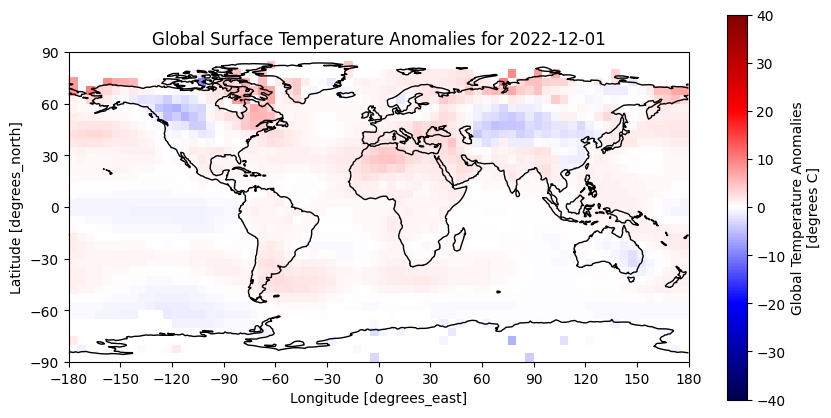

In [32]:
#!pip install cartopy

import matplotlib.pyplot as plot
import cartopy.crs as ccrs
import numpy as np

vmin=ds['anom'].attrs['valid_min']
vmax=ds['anom'].attrs['valid_max']
vmin_abs=abs(vmin)
abx_max=max(vmin_abs,vmax)

plot.figure(figsize=(10,5))
ax=plot.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_xticks(range(-180,181,30),crs=ccrs.PlateCarree())
ax.set_yticks(range(-90,91,30),crs=ccrs.PlateCarree())
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

data_for_desired_date['anom'].plot(vmin=-abx_max,vmax=abx_max,cmap='seismic')
plot.title(f'Global Surface Temperature Anomalies for {desired_date}')
plot.show()

